In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [17]:
X, Y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

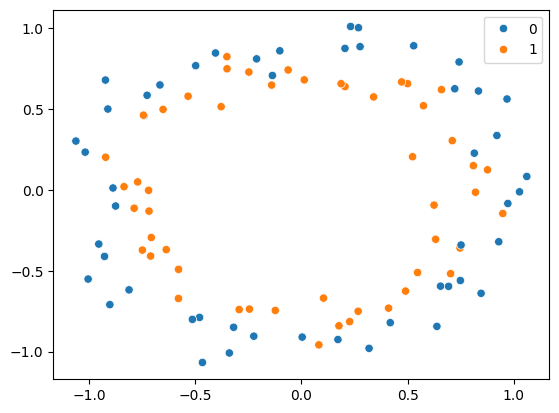

In [18]:
sns.scatterplot(x=X[:,0], y=X[:,1],hue=Y)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2
                                                   , random_state=2)

In [20]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Parth\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4000, verbose=0)

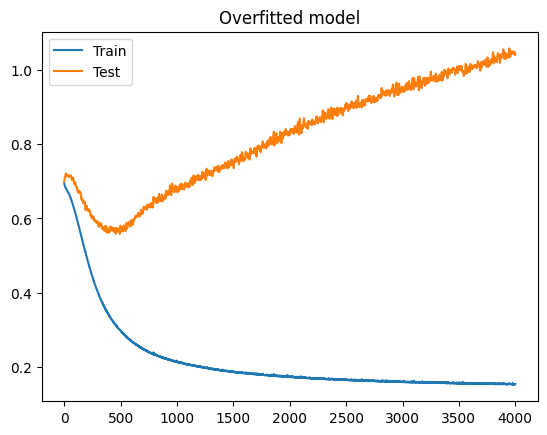

In [24]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title("Overfitted model")
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 502us/step


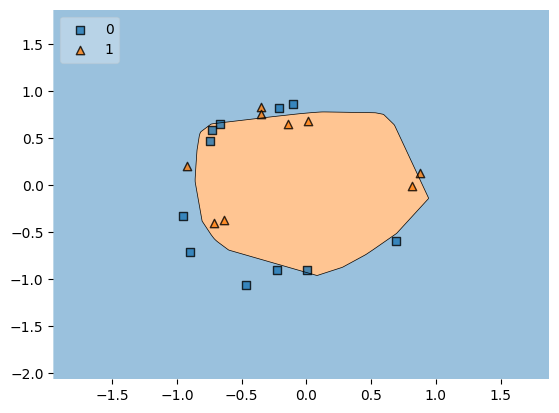

In [25]:
plot_decision_regions(x_test, y_test.ravel(), clf=model, legend=2)
plt.show()

---
## Early stopping

In [41]:
# Redefining the model

model_2 = Sequential()

model_2.add(Dense(256, activation='relu', input_dim=2))
model_2.add(Dense(1, activation='sigmoid'))

In [42]:
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [44]:
history_2 = model_2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4000, callbacks=callback)

Epoch 1/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.5031 - loss: 0.6900 - val_accuracy: 0.5500 - val_loss: 0.6866
Epoch 2/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4703 - loss: 0.6925 - val_accuracy: 0.5500 - val_loss: 0.6905
Epoch 3/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4508 - loss: 0.6925 - val_accuracy: 0.5500 - val_loss: 0.6931
Epoch 4/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5039 - loss: 0.6876 - val_accuracy: 0.4500 - val_loss: 0.6965
Epoch 5/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5039 - loss: 0.6862 - val_accuracy: 0.4500 - val_loss: 0.6996
Epoch 6/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5102 - loss: 0.6853 - val_accuracy: 0.4500 - val_loss: 0.7028
Epoch 7/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5203 - loss: 0.6873 - val_accuracy: 0.4000 - val_loss: 0.7057
Epoch 8/4000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5578 - loss: 0.6813 - val_accuracy: 0.4000 - 

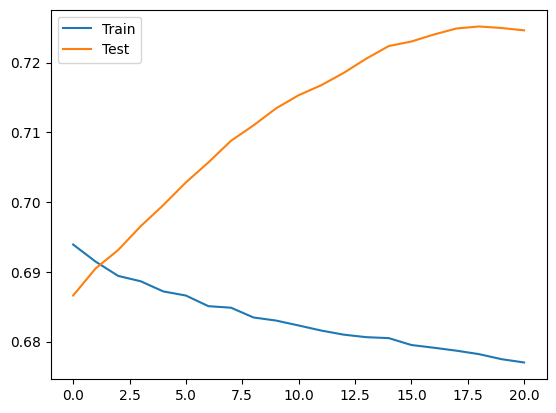

In [45]:
plt.plot(history_2.history["loss"], label="Train")
plt.plot(history_2.history["val_loss"], label="Test")
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 6s 624us/step


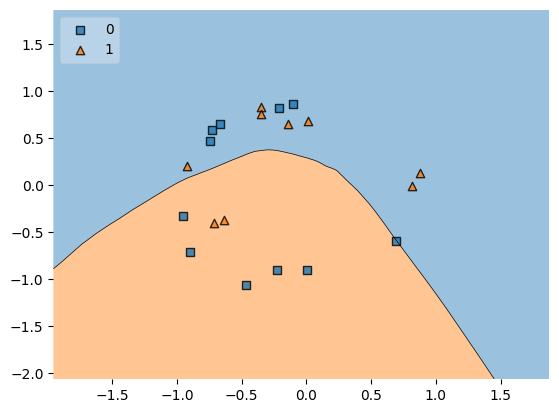

In [46]:
plot_decision_regions(x_test, y_test.ravel(), clf=model_2, legend=2)
plt.show()